# Importing dependencies

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score 

--- 
# Data cleaning and analysis 
### DATA COLLECTION : PIMA DIABETES DATASET

In [3]:
# loading the diabetes dataset into pandas dataframe 
diabetes_dataset = pd.read_csv('diabetes.csv')

In [4]:
#pd.read_csv?

In [5]:
#printing first 5 rows of data  
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<b>OUTCOME: </b><br>
 - 1: patient has diabetes
 - 0: patient doesn't have diabetes 

In [6]:
# name of all the columns 
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# number of rows and columns 
diabetes_dataset.shape

(768, 9)

In [8]:
# getting statistical measures of the data 
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
# data type and nulls in the data 
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome'>

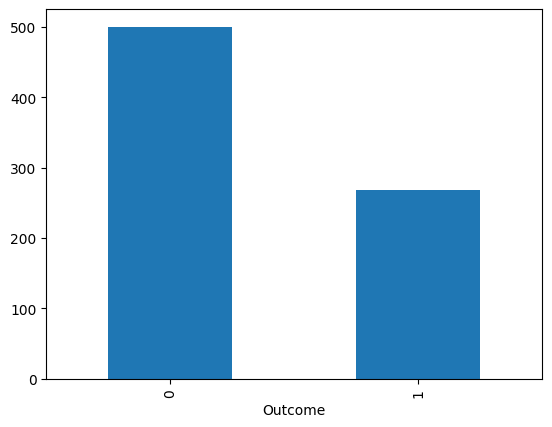

In [13]:
# checking the class proportions
diabetes_dataset['Outcome'].value_counts().plot(kind = 'bar')

0 -> NON DIABETIC 

1 -> DIABETIC 

In [14]:
class0 = round(((500/768)*100),2)
class1 = round(((268/768)*100),2)
print(f'class 0 : {class0}%')
print(f'class 1 : {class1}%')

class 0 : 65.1%
class 1 : 34.9%


In [15]:
# check mean of each column for each class using groupby
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Split data into X and y

In [16]:
X = diabetes_dataset.drop(columns = 'Outcome', axis = 1)
y = diabetes_dataset['Outcome']

In [17]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [18]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Data standardization 

In [19]:
# initialise the object of standard scaler 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X = pd.DataFrame(X, columns= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [21]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [22]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


# Split the data into training and testing 

In [23]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2 , stratify = y,random_state =100)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Training the SVC model on the training data 

In [25]:
svc_model = SVC(kernel = 'linear')

In [26]:
# train the model 
svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# Check the training accuracy (must be > 75 )

In [27]:
# use training data to predict the outcome 
y_train_pred = svc_model.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)

In [28]:
print(f'accuracy score of the model is: {accuracy}')
print(f'precision score of the model is: {precision}')

accuracy score of the model is: 0.7801302931596091
precision score of the model is: 0.7453416149068323


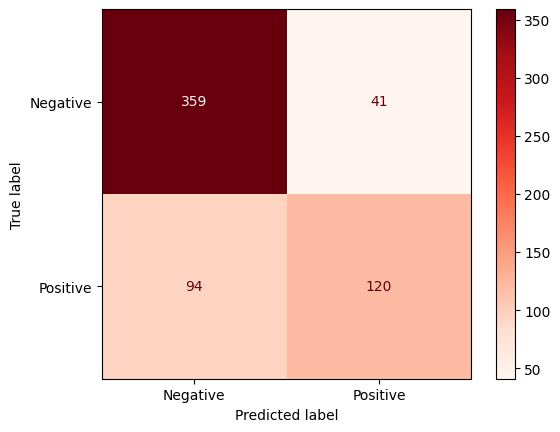

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
x = confusion_matrix(y_train, y_train_pred)
cm = ConfusionMatrixDisplay(x,display_labels = ['Negative', 'Positive'])
cm.plot(cmap = 'Reds')
plt.show()

# Testing the accuracy of the model on unseen data

In [30]:
# test model on X_test
y_test_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

In [31]:
print(f'accuracy score of the model is: {accuracy}')
print(f'precision score of the model is: {precision}')

accuracy score of the model is: 0.7792207792207793
precision score of the model is: 0.75


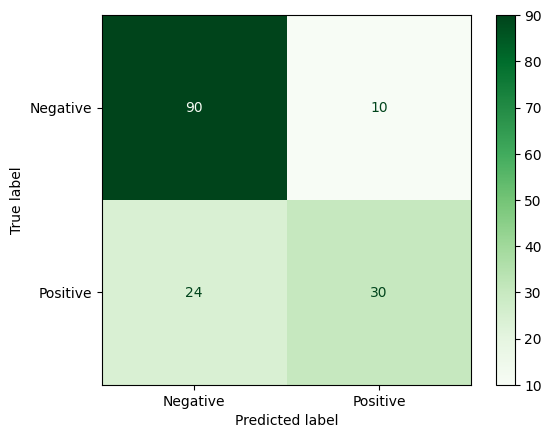

In [32]:
x = confusion_matrix(y_test, y_test_pred)
cm = ConfusionMatrixDisplay(x,display_labels = ['Negative', 'Positive'])
cm.plot(cmap = 'Greens')
plt.show()

# Making a predictive system

In [35]:
# total columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

print('THIS IS YOUR DIABETES PREDICTION SYSTEM !!')

input('PRESS ENTER TO START.')

start = 1 

print('------------------------------------------------------------------------------------\n')
while start == 1:
    Pregnancies = int(input('ENTER THE NUMBER OF PREGNANCIES: '))
    Glucose = int(input('ENTER THE GLUCOSE LEVEL: '))
    BloodPressure = int(input('ENTER THE BLOOD PRESSURE LEVEL: '))
    SkinThickness = int(input('ENTER THE SKIN THICKNESS VALUE: '))
    Insulin = int(input('ENTER THE INSULIN LEVEL: '))
    Bmi =float(input('ENTER THE BMI VALUE: '))
    DiabetesPedigreeFunction = float(input('ENTER THE DIABETES PEDIGREE FUNCTION: '))
    Age = int(input('ENTER THE AGE: '))
    start -= 1
    
input_data = [Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Bmi,DiabetesPedigreeFunction,Age]
    
# convert this list into numpy array 
input_data_np_array = np.asarray(input_data)

# reshape the array 
input_data_reshaped = input_data_np_array.reshape(1,-1)

# standardize the data 
std_data = scaler.transform(input_data_reshaped)

# predict the outcome 
pred = svc_model.predict(std_data)

print('------------------------------------------------------------------------------------\n')


if pred[0]==0:
    print('✅ Low diabetes risk')
else:
    print('⚠️ High diabetes risk detected')
print('------------------------------------------------------------------------------------\n')
    
   

THIS IS YOUR DIABETES PREDICTION SYSTEM !!


PRESS ENTER TO START. 


------------------------------------------------------------------------------------



ENTER THE NUMBER OF PREGNANCIES:  4
ENTER THE GLUCOSE LEVEL:  90
ENTER THE BLOOD PRESSURE LEVEL:  88
ENTER THE SKIN THICKNESS VALUE:  47
ENTER THE INSULIN LEVEL:  54
ENTER THE BMI VALUE:  37.7
ENTER THE DIABETES PEDIGREE FUNCTION:  0.623
ENTER THE AGE:  29


------------------------------------------------------------------------------------

✅ Low diabetes risk
------------------------------------------------------------------------------------

